# Millet Class Prediction

## Problem Statement

### We are given data with four classes of millets(output variable). Given the historical data we predict what class of millet showed be taken as the next crop.

# Importing necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from A_Modification import describe as desc

from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split as tts

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Data dictionary

In [2]:
Data_Dict = pd.read_excel('Data_Dict.xlsx')

Data_Dict

,Feature,Feature_Type,Description
0,Moisture,Float64,Average moisture during the crop period
1,rainfall,Float64,Rainfall During the crop period
2,Average Humidity,Int64,Average humidity during the crop period
3,Mean Temp,Int64,Mean temperature during the crop period
4,max Temp,Int64,Mean max temperature during the crop
5,Min temp,Int64,Mean minimum temperature during the crop
6,alkaline,Int64,Binary value 1 for alkaline soil and 0 for non...
7,sandy,Int64,Binary value 1 forsandy soil and 0 for non-sandy
8,chalky,Int64,Binary value 1 for chalky soil and 0 for non-c...
9,clay,Int64,Binary value 1 for calyey soil and 0 for non-c...


## Importing the dataset

In [3]:
data = pd.read_excel('data.xlsx')

data.head()

,Moisture,rainfall,Average Humidity,Mean Temp,max Temp,Min temp,alkaline,sandy,chalky,clay,millet yield
0,12.801685,0.012360,57,62,71,52,0,1,0,0,2
1,12.851654,0.004172,57,58,73,43,0,1,0,0,0
2,12.776773,0.000000,56,58,69,46,0,0,1,0,4
3,12.942001,0.031747,62,56,70,43,0,1,0,0,0
4,12.984652,0.000000,65,56,70,42,0,0,0,1,1


## Checking for missing values

In [4]:
data.isnull().sum()

Moisture            0
rainfall            0
Average Humidity    0
Mean Temp           0
max Temp            0
Min temp            0
alkaline            0
sandy               0
chalky              0
clay                0
millet yield        0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Moisture          800 non-null    float64
 1   rainfall          800 non-null    float64
 2   Average Humidity  800 non-null    int64  
 3   Mean Temp         800 non-null    int64  
 4   max Temp          800 non-null    int64  
 5   Min temp          800 non-null    int64  
 6   alkaline          800 non-null    int64  
 7   sandy             800 non-null    int64  
 8   chalky            800 non-null    int64  
 9   clay              800 non-null    int64  
 10  millet yield      800 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 68.9 KB


In [6]:
data.shape

(800, 11)

## Statisctical description of the data

In [7]:
desc.new_describe(data)

,Moisture,rainfall,Average Humidity,Mean Temp,max Temp,Min temp,alkaline,sandy,chalky,clay,millet yield
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,12.903866,0.066509,49.601250,76.503750,89.073750,63.915000,0.343750,0.321250,0.047500,0.287500,1.711250
std,0.099445,0.091065,18.283602,11.706570,11.183118,13.060187,0.475256,0.467249,0.212839,0.452880,1.641262
min,12.547993,0.000000,10.000000,52.000000,60.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.833139,0.000000,37.000000,68.000000,81.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.910599,0.017919,49.000000,79.000000,90.000000,66.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12.973614,0.105211,62.000000,86.000000,97.000000,75.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,13.183391,0.369133,100.000000,102.000000,112.000000,93.000000,1.000000,1.000000,1.000000,1.000000,4.000000
mad,0.080476,0.073059,14.865316,9.953394,9.165800,11.301425,0.451172,0.436097,0.090488,0.409687,1.462816


## Splitting the data on the basis of categorical and numerical variables

In [8]:
# Numerical Values dataframe
cols = data.columns[: 6].tolist()
cols.append(data.columns[len(data.columns)-1])
data_num = data[cols]

data_num.head()

,Moisture,rainfall,Average Humidity,Mean Temp,max Temp,Min temp,millet yield
0,12.801685,0.012360,57,62,71,52,2
1,12.851654,0.004172,57,58,73,43,0
2,12.776773,0.000000,56,58,69,46,4
3,12.942001,0.031747,62,56,70,43,0
4,12.984652,0.000000,65,56,70,42,1


In [9]:
# Categorical Values dataframe
data_cat = data[data.columns[6: 10]]

data_cat.head()

,alkaline,sandy,chalky,clay
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,0,1


## EDA - Exploratory Data Analysis

### Univariate Analysis

#### Categorical Variables

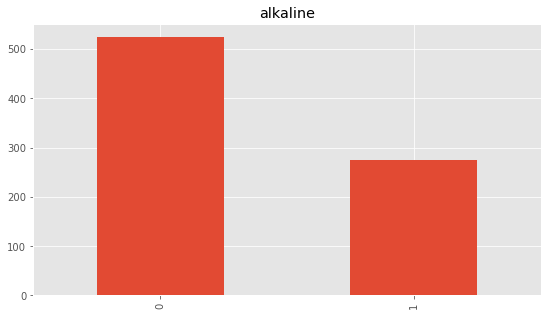

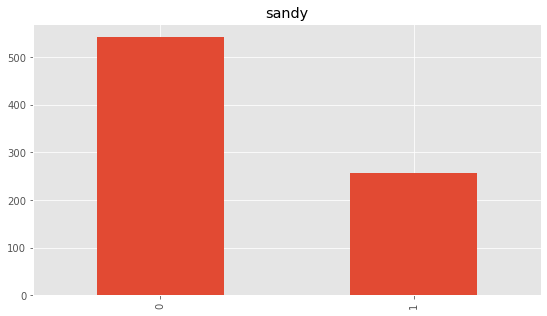

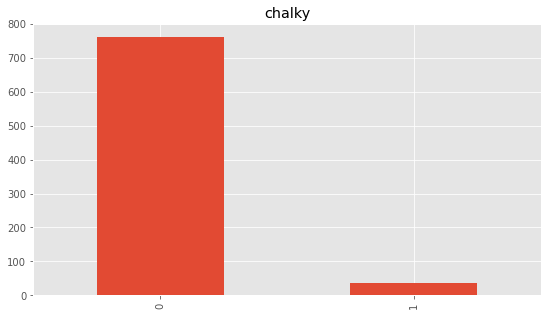

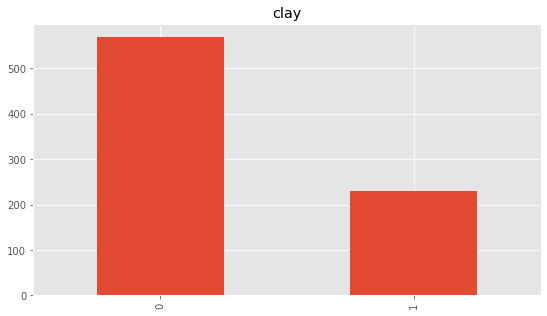

In [10]:
columns = data_cat.columns
plt.style.use('ggplot')
for col in columns :
    plt.figure(figsize = (20, 5))
    plt.subplot(121)
    data_cat[col].value_counts().plot(kind = 'bar')
    plt.title(col)

## Observations
### The soil types are highly varying, so these seem to be good contenders to feed to the model. 

#### Continuous variables

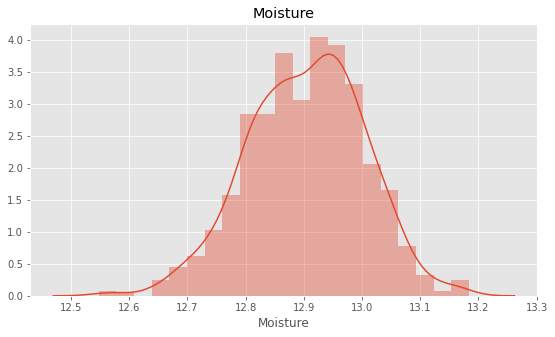

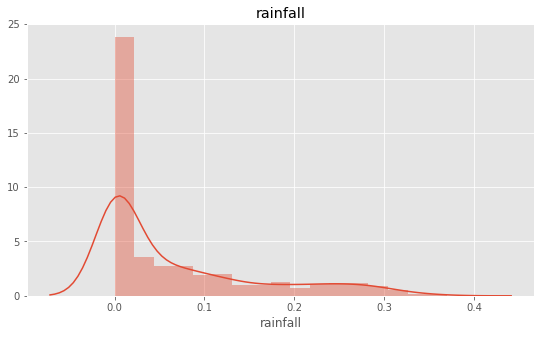

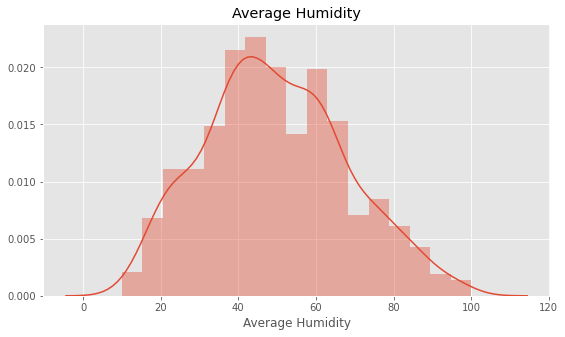

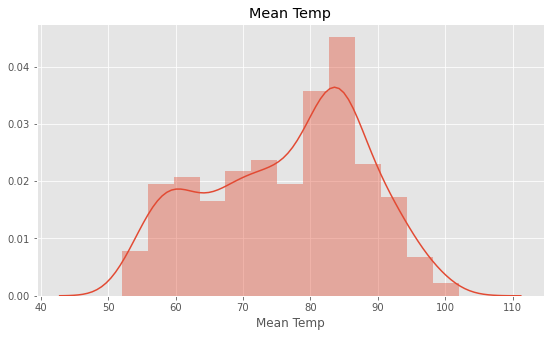

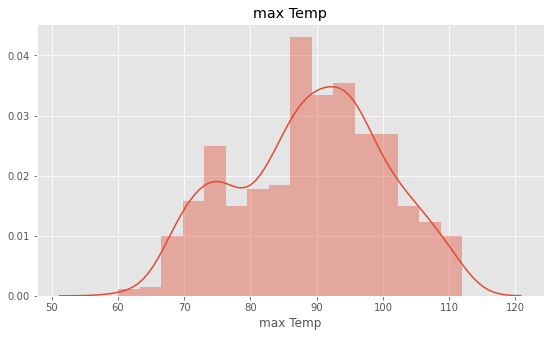

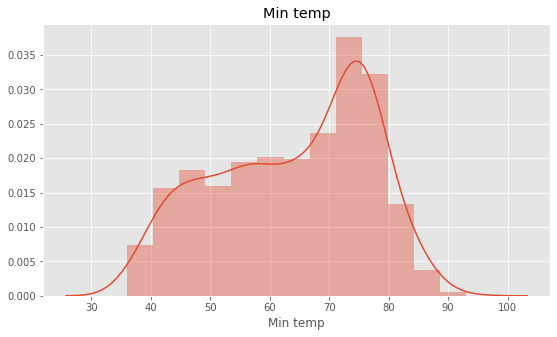

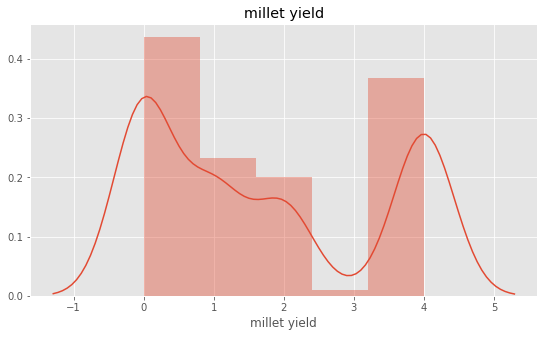

In [11]:
columns = data_num.columns
plt.style.use('ggplot')
for col in columns :
    plt.figure(figsize = (20, 5))
    plt.subplot(121)
    sns.distplot(data_num[col])
    #data_cat[col].value_counts().plot(kind = 'bar')
    plt.title(col)

## Observations

### The moisture level revolves around a single healthy value.
### The rainfall data is highly skewed to the right and has less variance. This shows there is little effect of rainfall on the yield.
#### This shows that the irrigation in the farms is well managed. 
### Since irrigation is well maintained, mean humidity, mean temperature, max temperature, min temperature go back and forth a single healthy value.

## Bivariate Analysis

### Categorical columns

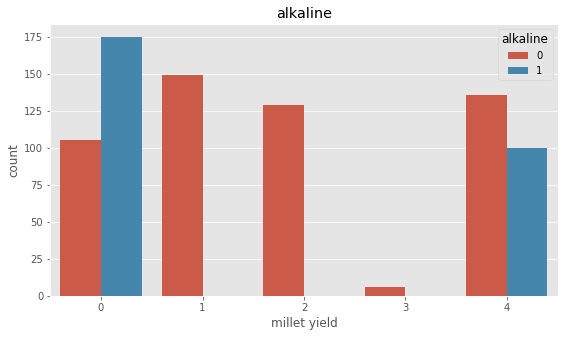

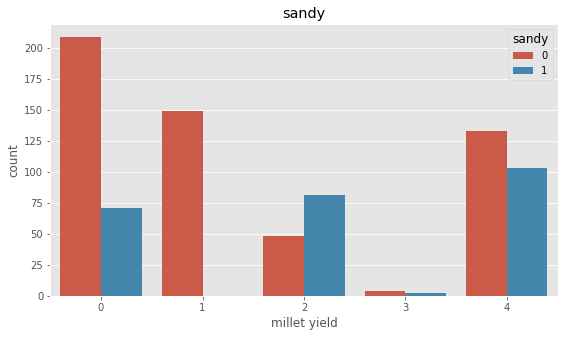

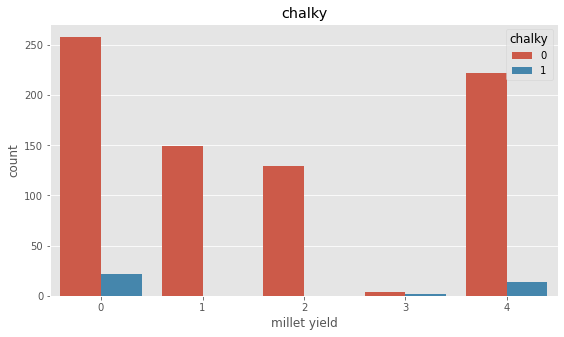

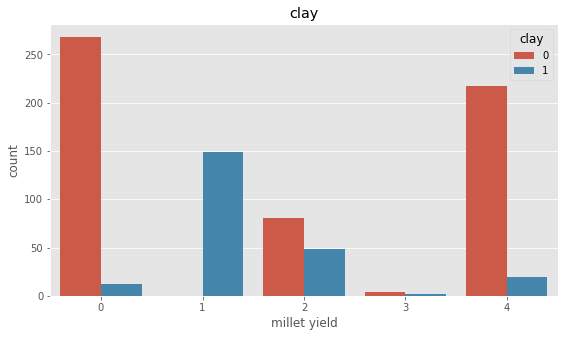

In [12]:
for col in data.columns[6: 10] :
    plt.figure(figsize = (20, 5))
    plt.subplot(121)
    sns.countplot(x = data['millet yield'], hue = data[col], data = data)
    plt.title(col)

### Continuous variables

In [13]:
data_num.corr()

,Moisture,rainfall,Average Humidity,Mean Temp,max Temp,Min temp,millet yield
Moisture,1.000000,0.073969,-0.024835,0.005400,-0.005135,0.012638,-0.242333
rainfall,0.073969,1.000000,-0.130386,-0.232643,-0.211811,-0.235690,-0.231908
Average Humidity,-0.024835,-0.130386,1.000000,-0.216782,-0.405017,-0.041475,0.003707
Mean Temp,0.005400,-0.232643,-0.216782,1.000000,0.958609,0.970057,0.024256
max Temp,-0.005135,-0.211811,-0.405017,0.958609,1.000000,0.862663,0.042416
Min temp,0.012638,-0.235690,-0.041475,0.970057,0.862663,1.000000,0.008780
millet yield,-0.242333,-0.231908,0.003707,0.024256,0.042416,0.008780,1.000000


## Observations

### alkaline, sandy, chalky, clay seem to have good impact on millet yield(since the 0:1 ratio in each case is most of the times not close to zero). 

## Outlier detection(can only be done on continuous variables)

In [14]:
for col in data_num :
    data[col] = winsorize(data[col], limits = [0.05, 0.1], inclusive = (True, True))

## Selecting statistically significant features

### Categorical Variables

In [15]:
for col in data_cat.columns :
    cont = pd.crosstab(data_cat[col], data['millet yield'], margins = True)
    
    stat, p, dof, exp = stats.chi2_contingency(cont)
    alpha = 0.05
    if(p <= alpha) :
        print(col, 'is statistically significant')
    else :
        print(col, 'is statistically insignificant')

alkaline is statistically significant
sandy is statistically significant
chalky is statistically significant
clay is statistically significant


### Continuous variables

In [16]:
data[data_num.columns].corr()

,Moisture,rainfall,Average Humidity,Mean Temp,max Temp,Min temp,millet yield
Moisture,1.000000,0.059146,-0.019271,-0.007115,-0.018029,0.000603,-0.236540
rainfall,0.059146,1.000000,-0.133858,-0.245714,-0.221890,-0.252241,-0.246618
Average Humidity,-0.019271,-0.133858,1.000000,-0.209624,-0.395539,-0.040026,0.014917
Mean Temp,-0.007115,-0.245714,-0.209624,1.000000,0.957421,0.969085,0.042486
max Temp,-0.018029,-0.221890,-0.395539,0.957421,1.000000,0.860601,0.060569
Min temp,0.000603,-0.252241,-0.040026,0.969085,0.860601,1.000000,0.023844
millet yield,-0.236540,-0.246618,0.014917,0.042486,0.060569,0.023844,1.000000


## Splitting data into train and validation sets

In [17]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_val, y_train, y_val = tts(x, y, test_size = .1, random_state = 42)

In [18]:
'''The data is now ready to be fed into a machine learning algorithm. In this case LogisticRegression, '''

'The data is now ready to be fed into a machine learning algorithm. In this case LogisticRegression, '

## DecisionTreeClassifier

In [19]:
DC = DecisionTreeClassifier()

DC.fit(x_train, y_train)

y_pred_DC = DC.predict(x_val)

In [20]:
multilabel_confusion_matrix(y_val, y_pred_DC, labels = [0, 1, 2, 3, 4])

array([[[57,  0],
        [ 1, 22]],

       [[60,  0],
        [ 0, 20]],

       [[67,  1],
        [ 0, 12]],

       [[80,  0],
        [ 0,  0]],

       [[55,  0],
        [ 0, 25]]], dtype=int64)

In [21]:
print(classification_report(y_val, y_pred_DC, labels = [0, 1, 2, 3, 4]))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       1.00      1.00      1.00        20
           2       0.92      1.00      0.96        12
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        25

   micro avg       0.99      0.99      0.99        80
   macro avg       0.78      0.79      0.79        80
weighted avg       0.99      0.99      0.99        80



In [22]:
accuracy_score(y_val, y_pred_DC)

0.9875

## Visualizing the decision tree

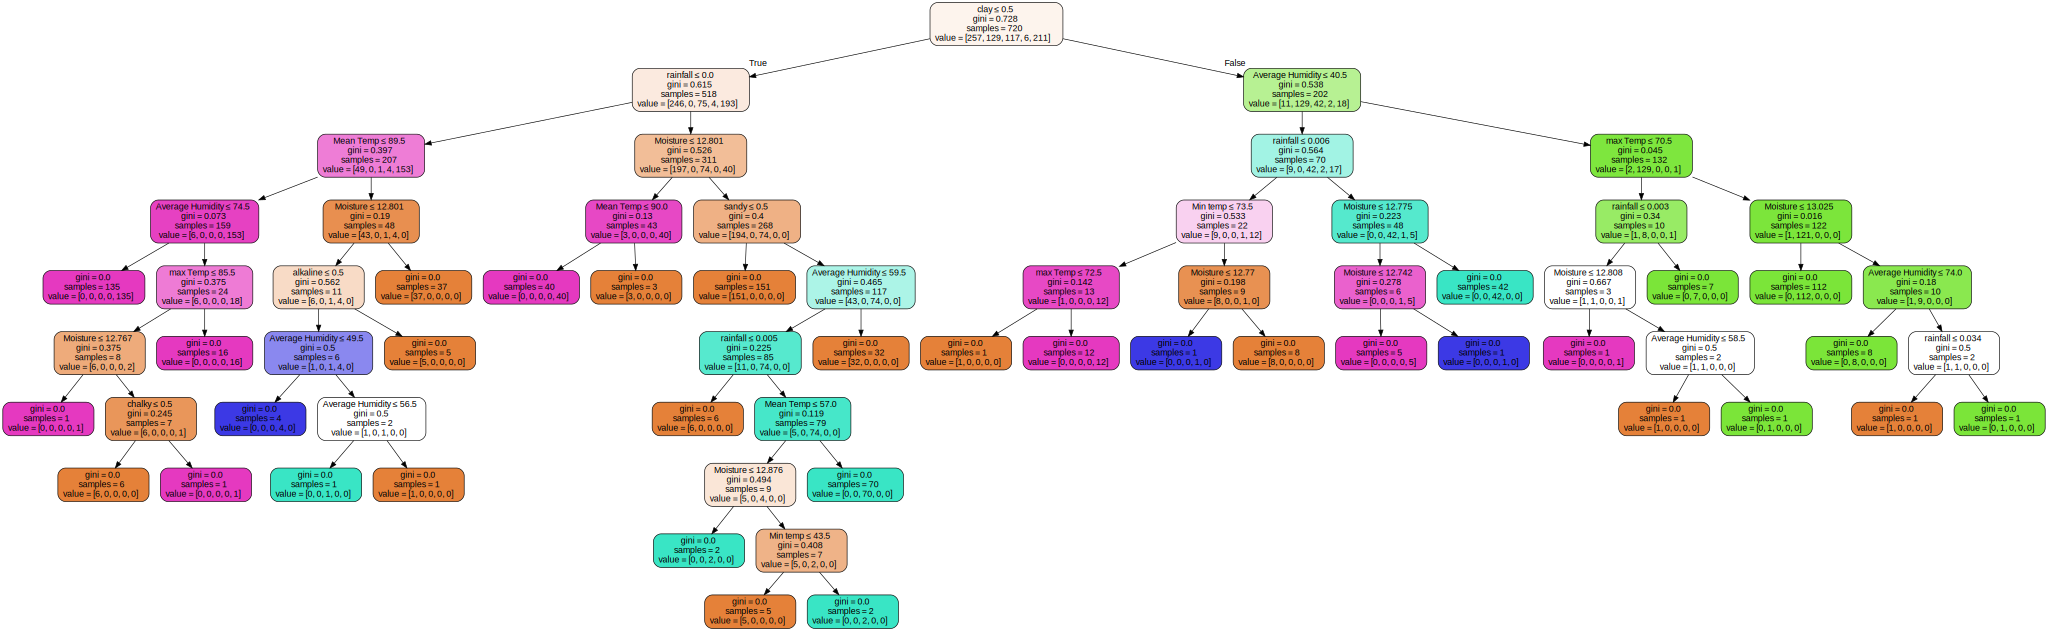

In [28]:
dot_data = export_graphviz(DC, out_file = None,
                          feature_names = x_train.columns, filled = True, rounded = True,
                           special_characters = True)

graph = Source(dot_data)

#graph.render('tree') #Saving the tree as a .pdf file

graph

In [28]:
import anvil.server

anvil.server.connect("JULZT5VMZVKJ7W6IK5647WCO-4OXOKFI7EN47Q4YG")

In [ ]:
import anvil.server

anvil.server.connect("JULZT5VMZVKJ7W6IK5647WCO-4OXOKFI7EN47Q4YG")

@anvil.server.callable
def classify_millet(moisture, rainfall, avg_humidity, avg_temp, max_temp, min_temp, alkaline , sandy , chalky , clay) :
    l = [[float(moisture), float(rainfall), float(avg_humidity), float(avg_temp), float(max_temp), float(min_temp), float(alkaline), float(sandy), float(chalky), float(clay)]]
    #l = np.array((map(float, l)))
    pred = DC.predict(l)
    
    return pred

anvil.server.wait_forever()


Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-11:
Traceback (most recent call last):
  File "c:\users\sachin\appdata\local\programs\python\python38\lib\site-packages\anvil\server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "c:\users\sachin\appdata\local\programs\python\python38\lib\site-packages\anvil\server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "c:\users\sachin\appdata\local\programs\python\python38\lib\site-packages\anvil\_threaded_server.py", line 402, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\sachin\appdata\local\programs\python\python38\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\users\sachin\appdata\local\programs\python\python38\l

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


Exception in thread Thread-14:
Traceback (most recent call last):
  File "c:\users\sachin\appdata\local\programs\python\python38\lib\site-packages\anvil\server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "c:\users\sachin\appdata\local\programs\python\python38\lib\site-packages\anvil\server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "c:\users\sachin\appdata\local\programs\python\python38\lib\site-packages\anvil\_threaded_server.py", line 402, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\sachin\appdata\local\programs\python\python38\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\users\sachin\appdata\local\programs\python\python38\l

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
